### <h1 style="color:darkblue;font-family:cambria;font-size:43px;"   align=center >Handwritten digit Recognition : SVM </h1>
#  
**Overview:**

This project focuses on digit recognition using a Support Vector Machine (SVM) model trained on the MNIST dataset. The goal is to classify handwritten digits from 0 to 9 with high accuracy using the SVM algorithm.

**Key Steps:**
1. **Data Preprocessing:** This project involves preprocessing the MNIST dataset by flattening the images and standardizing the features to prepare them for input to the SVM model.
   
2. **Model Training:** An SVM model with a radial basis function (RBF) kernel is created and trained on the training data. The model is configured with appropriate hyperparameters such as C and gamma.
   
3. **Validation and Testing:** The trained SVM model is evaluated on a validation set to assess its performance. Subsequently, the model's accuracy is measured on a separate test set to evaluate its generalization ability.

4. **Visualization:** The project may include visualizations of the SVM decision boundaries, support vectors, and classification results to provide insights into the model's behavior.

5. **Single Image Prediction:** Optionally, a functionality can be implemented to predict a single digit from a user-provided image using the trained SVM model.

**Outcome:**
The project aims to demonstrate the effectiveness of SVM in digit recognition tasks, showcasing its ability to classify handwritten digits accurately. By leveraging the SVM algorithm, the project highlights the importance of feature scaling, kernel selection, and hyperparameter tuning in achieving optimal performance.


In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset from a local path
(X_train, y_train), (X_test, y_test) = mnist.load_data()

we can use mnist dataset by directly using this load_data() method which shows like this :
* Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

or If we dont have an internet connection we can proceed if we have a mnist dataset locally and we can proceed by giving the path as perameter to load_data() method like this :
* mnist.load_data(path="C:\\Users\\.....")

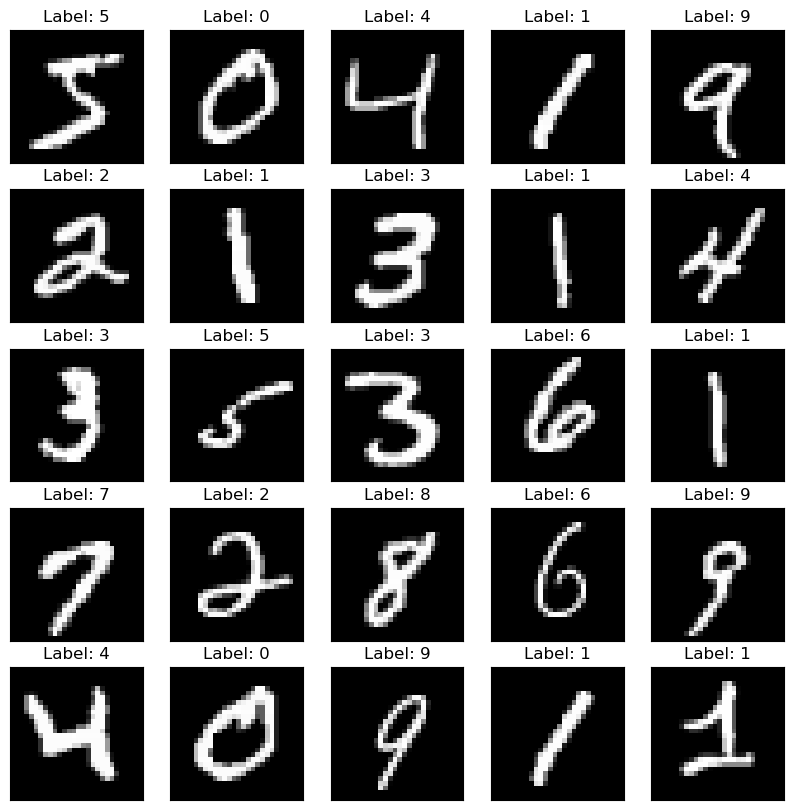

Total number of images in the training set: 60000


In [4]:

import matplotlib.pyplot as plt
# Display some images along with their labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.xticks([])
    plt.yticks([])
plt.show()

# Show the total number of images in the training set
print(f'Total number of images in the training set: {X_train.shape[0]}')

In [5]:
import numpy as np

# Reshape the training and test data to have a single channel
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))


Reshaping the training and test data to (28, 28, 1) in SVM ensures each image is represented as a 28x28 matrix with a single channel, aligning with SVM's 2D input format. This format allows the model to learn patterns from pixel intensities, making it compatible with image data and facilitating effective feature extraction and classification.

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
y_train.shape

(60000,)

In [8]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the labels for OneHotEncoder input
y_train_labels = y_train.reshape(-1, 1)
y_test_labels = y_test.reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the training labels
y_train = encoder.fit_transform(y_train_labels).toarray()

# Transform the test labels
y_test = encoder.transform(y_test_labels).toarray()
# Flatten the images for SVM input
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
print(X_test_flattened.shape)
print(X_train_flattened.shape)

(10000, 784)
(60000, 784)


1. **One-Hot Encoding Labels**:
   - The labels (y_train and y_test) are reshaped for OneHotEncoder input and then transformed using OneHotEncoder to convert categorical labels into one-hot encoded vectors.

2. **Flattening Images**:
   - The image data (X_train and X_test) is flattened here to a 1D array format to prepare it for input to the SVM model, ensuring each image is represented as a single feature vector.
   
3. **Data Transformation**:
   - we need to ensure the data is in the appropriate format for training an SVM model, with one-hot encoded labels and flattened image data ready for classification tasks.

In [11]:

# Reshape the labels for SVM input
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


In [12]:

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_train_flattened, y_train_labels, test_size=0.2, random_state=42)


In [13]:

from sklearn.svm import SVC

# Create and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

SVC()

In [14]:

from sklearn.metrics import accuracy_score

# Predict on the validation set
y_pred_val = svm_model.predict(X_val_svm)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val_svm, y_pred_val)
print('Validation accuracy:', val_accuracy)


Validation accuracy: 0.9775833333333334


In [15]:
# Predict on the test set
y_pred_test = svm_model.predict(X_test_flattened)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test_labels, y_pred_test)
print('Test accuracy:', test_accuracy)


Test accuracy: 0.9777


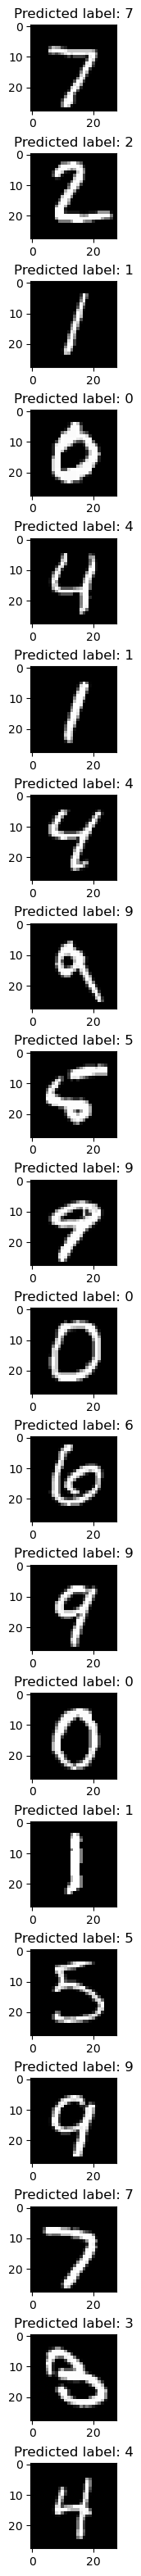

In [16]:
num_examples = 20
fig, axes = plt.subplots(nrows=num_examples, ncols=1, figsize=(10, 40))
for i in range(num_examples):
    # Make a prediction
    prediction = svm_model.predict(X_test_flattened[i:i+1])
    predicted_label = prediction[0]
    # Plot the image and the predicted label
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Predicted label: {predicted_label}')
fig.subplots_adjust(hspace=0.5)  # Add space between subplots
plt.show()

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
#preprocessing the image
def preprocess_image(image):
    image = cv2.resize(image, (28, 28))
    
    # Normalize the image
    image = image / 255.0
    
    # Expand dimensions to make it 4-dimensional
    image = np.expand_dims(image, axis=-1)
    
    # Flatten the image
    image = image.reshape(1, -1)
    
    return image


**Expanding Dimensions**:
   - The normalized image is expanded to include an additional dimension (channel dimension) using `np.expand_dims`. This step is necessary to match the expected input shape of the SVM model.

**Image Flattening**:
   - The expanded image is flattened into a 1D array using `reshape`. This step converts the image from a 4D tensor (batch size, height, width, channels) to a 2D array (batch size, flattened image).


In [ ]:
#predicting the number
def predict_number(model, image):
    # Preprocess the image
    image = preprocess_image(image)
    
    # Predict the number
    prediction = model.predict(image)
    
    # Get the predicted class
    predicted_number = prediction[0]
    
    return predicted_number

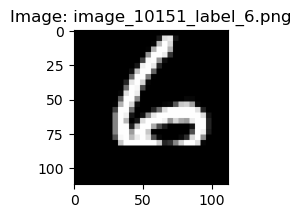

The predicted number in image_10151_label_6.png is: 6


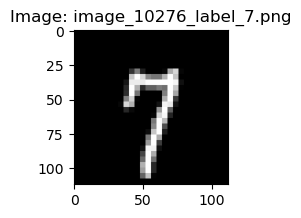

The predicted number in image_10276_label_7.png is: 7


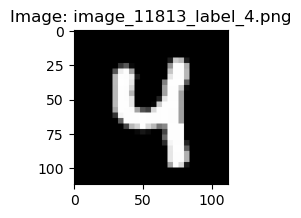

The predicted number in image_11813_label_4.png is: 4


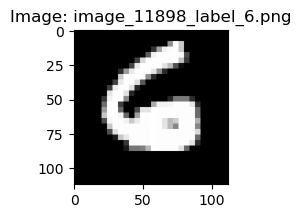

The predicted number in image_11898_label_6.png is: 6


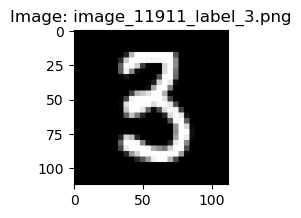

The predicted number in image_11911_label_3.png is: 3


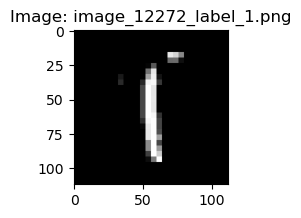

The predicted number in image_12272_label_1.png is: 1


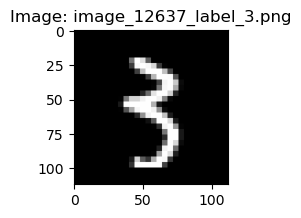

The predicted number in image_12637_label_3.png is: 3


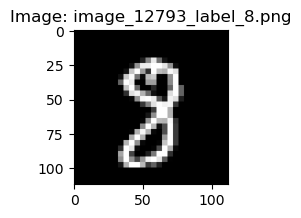

The predicted number in image_12793_label_8.png is: 8


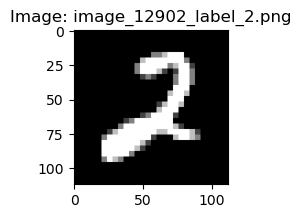

The predicted number in image_12902_label_2.png is: 2


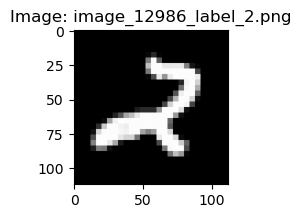

The predicted number in image_12986_label_2.png is: 2


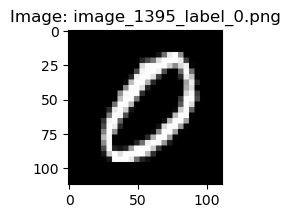

The predicted number in image_1395_label_0.png is: 0


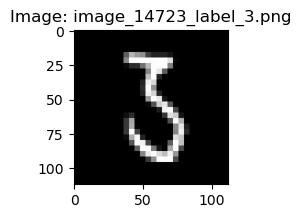

The predicted number in image_14723_label_3.png is: 3


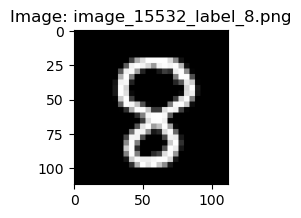

The predicted number in image_15532_label_8.png is: 8


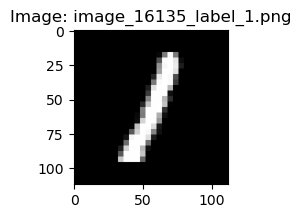

The predicted number in image_16135_label_1.png is: 1


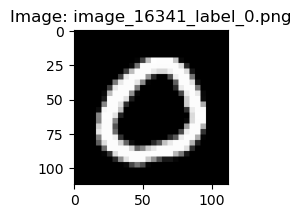

The predicted number in image_16341_label_0.png is: 0


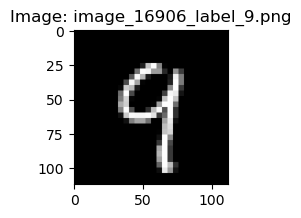

The predicted number in image_16906_label_9.png is: 9


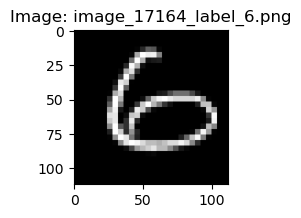

The predicted number in image_17164_label_6.png is: 6


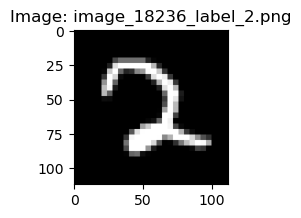

The predicted number in image_18236_label_2.png is: 2


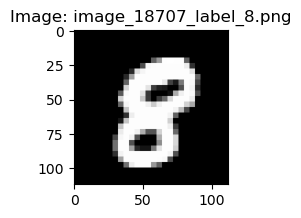

The predicted number in image_18707_label_8.png is: 8


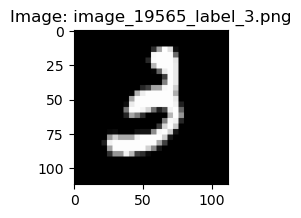

The predicted number in image_19565_label_3.png is: 3


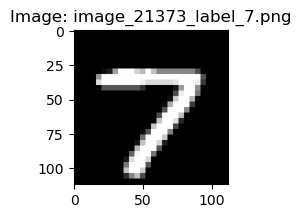

The predicted number in image_21373_label_7.png is: 7


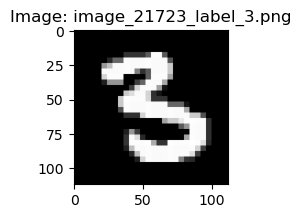

The predicted number in image_21723_label_3.png is: 3


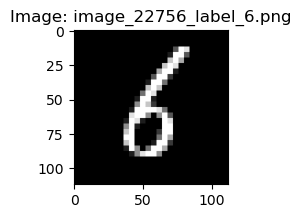

The predicted number in image_22756_label_6.png is: 6


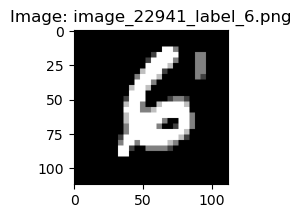

The predicted number in image_22941_label_6.png is: 6


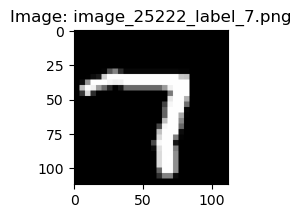

The predicted number in image_25222_label_7.png is: 7


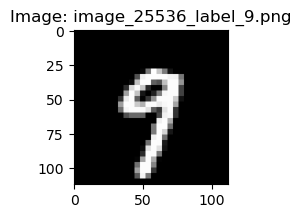

The predicted number in image_25536_label_9.png is: 9


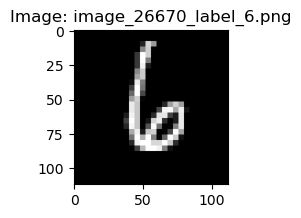

The predicted number in image_26670_label_6.png is: 6


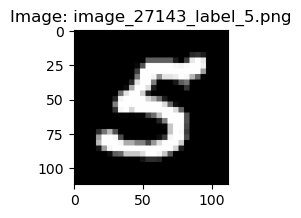

The predicted number in image_27143_label_5.png is: 5


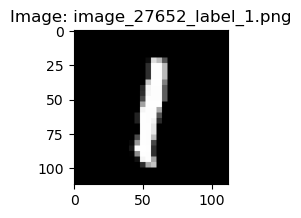

The predicted number in image_27652_label_1.png is: 1


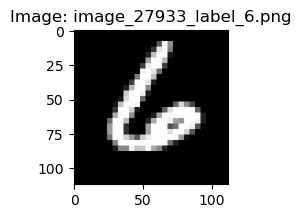

The predicted number in image_27933_label_6.png is: 6


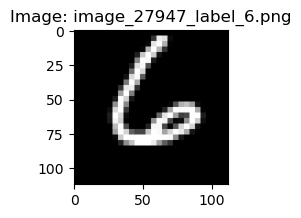

The predicted number in image_27947_label_6.png is: 6


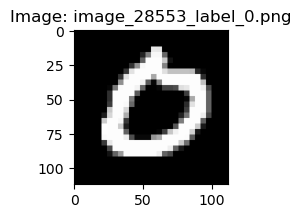

The predicted number in image_28553_label_0.png is: 0


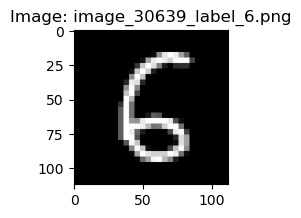

The predicted number in image_30639_label_6.png is: 6


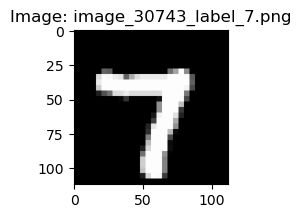

The predicted number in image_30743_label_7.png is: 7


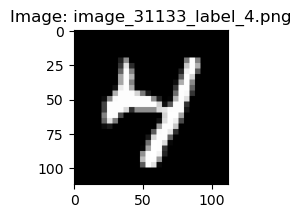

The predicted number in image_31133_label_4.png is: 4


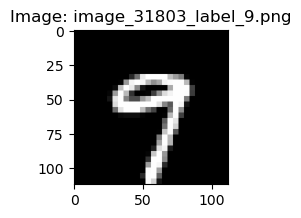

The predicted number in image_31803_label_9.png is: 9


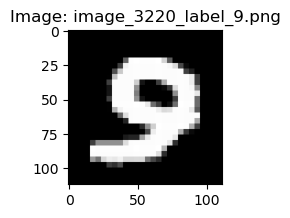

The predicted number in image_3220_label_9.png is: 9


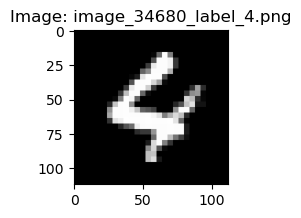

The predicted number in image_34680_label_4.png is: 4


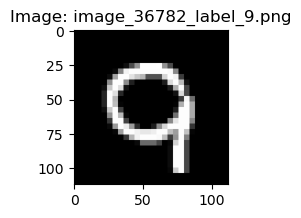

The predicted number in image_36782_label_9.png is: 9


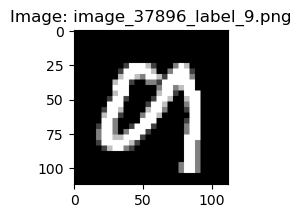

The predicted number in image_37896_label_9.png is: 9


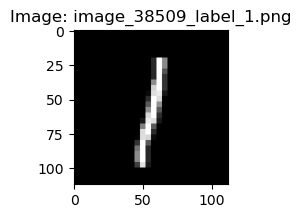

The predicted number in image_38509_label_1.png is: 1


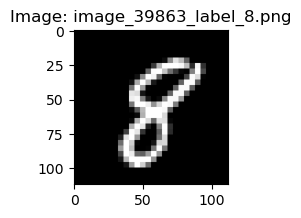

The predicted number in image_39863_label_8.png is: 8


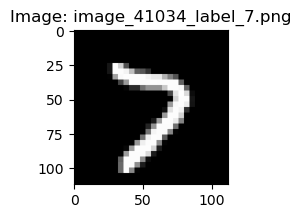

The predicted number in image_41034_label_7.png is: 7


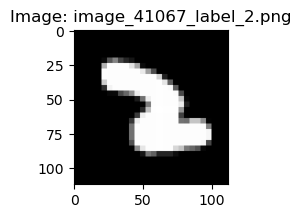

The predicted number in image_41067_label_2.png is: 2


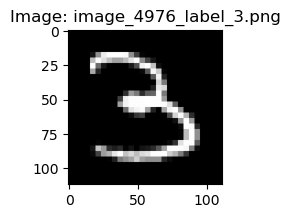

The predicted number in image_4976_label_3.png is: 3


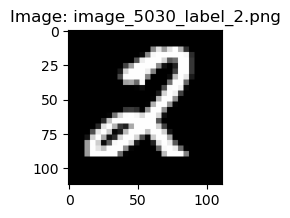

The predicted number in image_5030_label_2.png is: 2


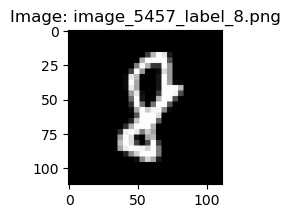

The predicted number in image_5457_label_8.png is: 8


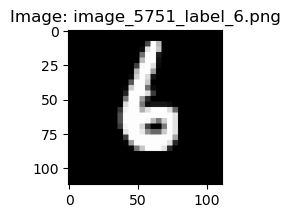

The predicted number in image_5751_label_6.png is: 6


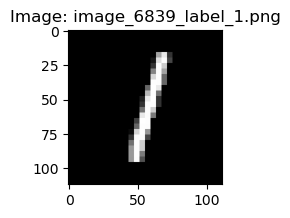

The predicted number in image_6839_label_1.png is: 1


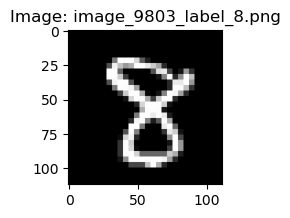

The predicted number in image_9803_label_8.png is: 8


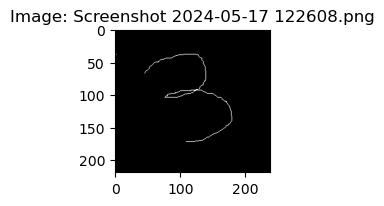

The predicted number in Screenshot 2024-05-17 122608.png is: 5


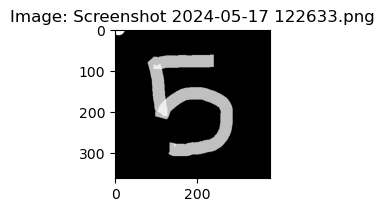

The predicted number in Screenshot 2024-05-17 122633.png is: 5


In [17]:
#iterate through all the files in our directory and sending to the model
def main(image_dir, model):
    # Loop through each image in the directory
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Load the image
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Predict the number in the image
            predicted_number = predict_number(model, image)
            
            # Display the original image
            plt.figure(figsize=(2, 2))
            plt.imshow(image, cmap='gray')
            plt.title(f'Image: {filename}')
            plt.show()
            
            # Print the predicted number
            print(f'The predicted number in {filename} is: {predicted_number}')

if __name__ == '__main__':
    # Set the directory containing the images
    image_dir = r"C:\Users\eswar\digits"
   
    # Call the main function
    main(image_dir, svm_model)

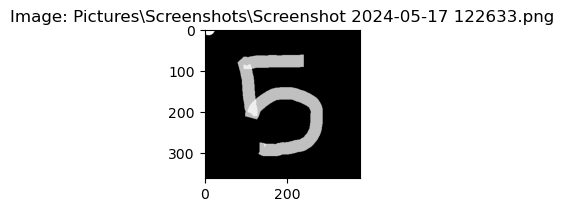

The predicted number in Pictures\Screenshots\Screenshot 2024-05-17 122633.png is: 5


In [19]:

# Load and preprocess the image
image_path = r"Pictures\Screenshots\Screenshot 2024-05-17 122633.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Predict the number
predicted_number = predict_number(svm_model, image)

# Display the image and prediction
plt.figure(figsize=(2, 2))
plt.imshow(image, cmap='gray')
plt.title(f'Image: {image_path}')
plt.show()

print(f'The predicted number in {image_path} is: {predicted_number}')